Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# MODELI U OPTICI
## 17.05.2021. 

# Pavle Janevski 0055/2020

***
<font color='red'>
Preimenovati svesku: File/Rename u __saobracaj1_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 1__: Interferencija na tankom filmu
Staklena pločica indeksa prelamanja $n_{s} = 1.5$ prekrivena je tankim slojem magnezijum-fluorida indeksa prelamanja $n_{1} = 1.36$. Debljina ovog filma je $d = 101$ nm. Sistem se nalazi u vazduhu koji ima indeks prelamanja jednak jedinici. Sastaviti programski kod koji računa reflektansu $R$ i transmitansu $T$ u zavisnosti od talasne dužine $\lambda$. Talasnu dužinu definisati kao niz i opsegu od 380 do 750 nm (vidljivi deo spektra) sa korakom od 1 nm. Smatrati da svetlost pada upravno na pločicu. Voditi računa o tome da je prirodna svetlost nepolarizovana, tj. podjednaka mešavina TE i TM polarizacije. Permitivnost i permeabilnost vakuuma iznose 8.854e-12 i 12.56e-7, respektivno, u odgovarajućim jedinicama.

Nacrtati grafike $R(\lambda)$, $T(\lambda)$ kao i zbir $R(\lambda) + T(\lambda)$. Prokomentarisati rezultat koji se dobija za zbir reflektanse i transmitanse.

Odrediti minimum reflektanse ovako projektovane strukture i objasniti smisao ovog minimuma.

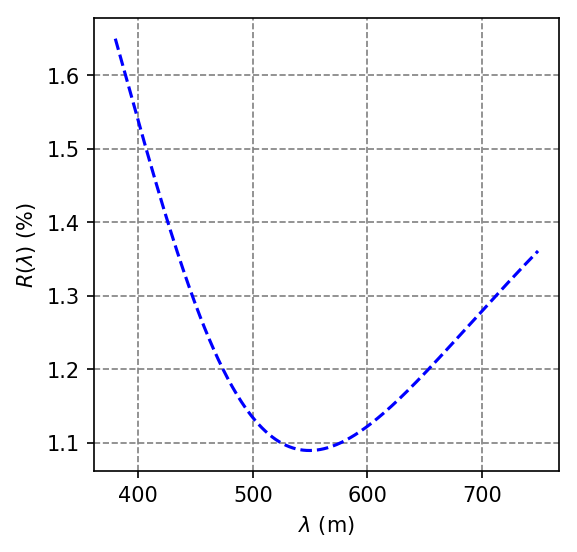

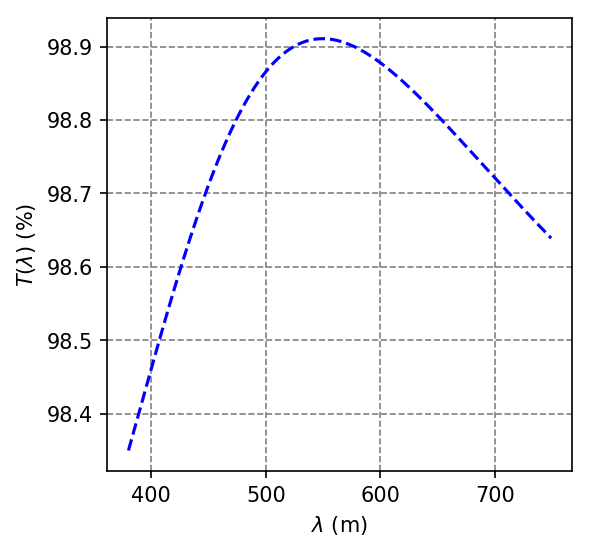

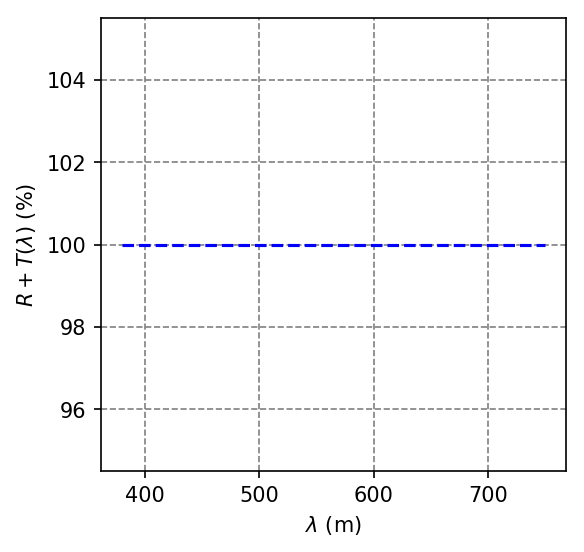

In [22]:
import numpy as np
import matplotlib.pyplot as plt

lam = np.arange(380e-9, 750e-9,1e-9)
epsilon0  = 8.854e-12
mi0 = 12.56e-7
n0 = 1
n1 = 1.36
ns = 1.5
d = 101e-9

thetai1 = 0
thetat1 = np.arcsin(n0 * np.sin(thetai1) / n1)
thetai2 = thetat1
thetat2 = np.arcsin(n1 * np.sin(thetai2) / ns)

Y0TE = np.sqrt(epsilon0 / mi0) * n0 * np.cos(thetai1)
Y0TM = np.sqrt(epsilon0 / mi0) * n0 / np.cos(thetai1)
YsTE = np.sqrt(epsilon0 / mi0) * ns * np.cos(thetat2)
YsTM = np.sqrt(epsilon0 / mi0) * ns / np.cos(thetat2)
Y1TE = np.sqrt(epsilon0 / mi0) * n1 * np.cos(thetat1)
Y1TM = np.sqrt(epsilon0 / mi0) * n1 / np.cos(thetat1)

h = n1*d*np.cos(thetat1)
k0 = 2*np.pi / lam

m11TE = np.cos(k0*h)
m12TE = 1j*np.sin(k0*h) / Y1TE
m21TE = 1j*Y1TE*np.sin(k0*h)
m22TE = np.cos(k0*h)

m11TM = np.cos(k0*h)
m12TM = 1j*np.sin(k0*h) / Y1TM
m21TM = 1j*Y1TM*np.sin(k0*h)
m22TM = np.cos(k0*h)

rTE = (Y0TE*m11TE + Y0TE*YsTE*m12TE - m21TE - YsTE*m22TE)/(Y0TE*m11TE + Y0TE*m11TE + Y0TE*YsTE*m12TE + m21TE + YsTE*m22TE)
rTM = (Y0TM*m11TM + Y0TM*YsTM*m12TM - m21TM - YsTE*m22TM)/(Y0TE*m11TM + Y0TM*m11TM + Y0TM*YsTM*m12TM + m21TM + YsTM*m22TM)


RTE = rTE*np.conj(rTE)
RTM = rTM*np.conj(rTM)
R = 0.5*(RTM + RTE)
T = 1 - R

plt.figure(figsize = (4,4),dpi = 150)
plt.plot(lam / 1e-9,100*R,'b--')
plt.xlabel('$\lambda$ (m)')
plt.ylabel('$R(\lambda)$ (%)')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--')
plt.show()

plt.figure(figsize = (4,4),dpi = 150)
plt.plot(lam / 1e-9,100*T,'b--')
plt.xlabel('$\lambda$ (m)')
plt.ylabel('$T(\lambda)$ (%)')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--')
plt.show()

plt.figure(figsize = (4,4),dpi = 150)
plt.plot(lam / 1e-9,100*(R+T),'b--')
plt.xlabel('$\lambda$ (m)')
plt.ylabel('$R + T(\lambda)$ (%)')
plt.grid(b = True, which = 'both', color = 'grey', linestyle = '--')
plt.show()

<font color='red'>Uneti tražene komentare.</font> 

Linearnom interpolacijom odrediti i ispisati vrednost transmitanse $T$ za talasnu dužinu $\lambda = 632.8$ nm.

In [25]:
100*np.interp(632.8*1e-9,lam,T)

(98.83291653471666+0j)

#### __Zadatak 2__: Interferencija na strukturi sa sistemom tankih filmova
Posmatrana struktura sastoji se od staklene pločice indeksa prelamanja $n_s = 1.5$ (koja se nalazi u vazduhu) i prekrivena je strukturom od dva tanka filma (vazduh – materijal 1 – material 2 – pločica). Indeks prelamanja za materijal 2 je $n_2 = 1.9971$, a za materijal 1 je $n_1 = 3.9716$. Debljina filmova je po $d = 100$ nm. 

Sastaviti programski kod koji izračunava reflektansu i transmitansu za opseg talasnih dužina kao u prethodnom zadatku. Smatrati da je incidencija normalna i da je upadna svetlost nepolarizovana. Na istom grafiku plavom bojom nacrtati reflektansu $R$ u funkciji talasne dužine, a crvenom bojom transmitansu $T$. Obeležiti ose grafika, uneti naslov grafika: $R$ i $T$ za sistem od 2 tanka filma. Na grafik uneti legendu.

Ponoviti postupak i traženi grafik za sistem od 4 filma (2 puta ponovljena kombinacija materijala 1 i materijala 2: vazduh – materijal 1 – materijal 2 – materijal 1 – materijal 2 – pločica). 

Ponoviti postupak i traženi grafik za sistem od 8 filmova (4 puta ponovljena kombinacija materijala 1 i materijala 2: vazduh – materijal 1 – materijal 2 – materijal 1 – materijal 2 – materijal 1 – materijal 2 – materijal 1 – materijal 2 – pločica).

Prokomentarisati razliku u reflektansama za ove 3 strukture. Šta se dešava sa profilom reflektanse i transmitanse kako broj tankih filmova raste? Šta bi moglo da se napravi na osnovu ovog efekta?

<font color='red'>Uneti tražene komentare.</font> 